In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import seaborn as sns
import time
import os.path

In [2]:
# Work on previously saved data
params_df = pd.read_csv('result//tree_part1//V1//V1_Reconst_Param_Wed_Jun_22_17_19_23_2022.csv')
results_df = pd.read_csv('result//tree_part1//V1//V1_Reconst_Result_Wed_Jun_22_17_19_23_2022.csv')

for index in params_df.columns:
    if (index == 'Unnamed: 0') :
        params_df.drop('Unnamed: 0', axis = 1, inplace=True)

for index in results_df.columns:
    if (index == 'Unnamed: 0') :
        results_df.drop('Unnamed: 0', axis = 1, inplace=True)


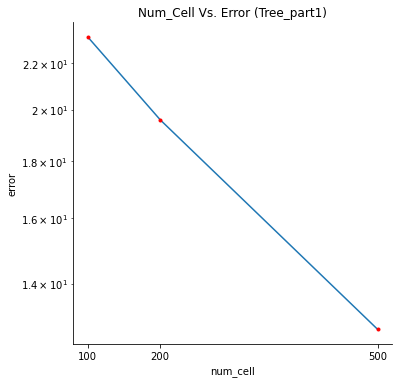

In [3]:
mean_err = params_df.groupby(['num_cell', 'sparse_freq', 'cell_sz', 'alp'], as_index = False).agg({'error':'mean'})
line_data = mean_err.groupby(['num_cell'], as_index = False).agg({'error':'min'})
fig = sns.relplot(x = line_data['num_cell'], y = line_data['error'], kind='line')
plt.title("Num_Cell Vs. Error (Tree_part1)")
plt.xticks(line_data['num_cell'])
fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')
plt.show()

In [4]:

min_mean_err_df = pd.DataFrame()
for i in mean_err['num_cell'].unique():
    temp = mean_err.loc[mean_err['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    min_mean_err_df = min_mean_err_df.append(temp.loc[temp['error'] == temp['error'].min()])
    
# Merge two data to extract
min_mean_err_df = min_mean_err_df.rename(columns={'error' : 'mean_err'})
merged_df = pd.merge(params_df, min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_sz', 'alp'], how = 'left')
plotting_data = merged_df.loc[merged_df['mean_err'].notnull()]

In [5]:
plotting_data

,rep,alp,num_cell,cell_sz,sparse_freq,error,mean_err
52,0,0.01,500,7,2,12.439536,12.744960
86,0,1.00,100,5,5,22.854568,23.218323
97,0,1.00,200,7,2,19.494898,19.589010
241,1,0.01,500,7,2,12.717911,12.744960
275,1,1.00,100,5,5,22.836570,23.218323
286,1,1.00,200,7,2,19.421882,19.589010
430,2,0.01,500,7,2,13.093823,12.744960
464,2,1.00,100,5,5,23.164525,23.218323
475,2,1.00,200,7,2,19.684421,19.589010
619,3,0.01,500,7,2,12.623645,12.744960


seaborn.axisgrid.FacetGrid

<Figure size 1080x1080 with 0 Axes>

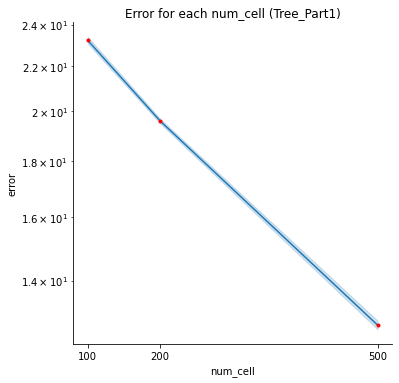

In [6]:
plt.figure(figsize=(15, 15))
fig = sns.relplot(data = plotting_data, x = 'num_cell', y = 'error', kind='line', palette='Accent', legend = False)
# sns.boxplot(data = plotting_data, x = 'num_cell', y = 'error')
fig.set(title='Error for each num_cell (Tree_Part1)')
plt.xticks(line_data['num_cell'])
fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')

# compress_fig = sns.relplot(data = compress_param_df, x = 'alpha', y = 'error', kind= 'line')
# compress_fig.set(yscale='log')
# compress_fig.set(xscale='log')
type(fig)

In [7]:
params_df['alp'].value_counts()

0.001       270
0.100       270
10.000      270
1000.000    270
0.010       270
100.000     270
1.000       270
Name: alp, dtype: int64